# Preparing Environment

In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

# Reading Data

In [2]:
oil = pd.read_csv("Oil.csv", header=0, index_col=0)

In [3]:
oil

Price
Date             
1987-05-20  18.63
1987-05-21  18.45
1987-05-22  18.55
1987-05-25  18.60
1987-05-26  18.63
...           ...
2019-09-17  65.59
2019-09-18  64.29
2019-09-19  64.25
2019-09-20  65.23
2019-09-23  64.66

[8211 rows x 1 columns]

In [4]:
gold = pd.read_excel("Gold.xlsx", header=8, index_col=3)
gold = gold.drop(columns=["Unnamed: %s" % i for i in range(3)])

In [5]:
gold

US dollar     Euro  Japanese yen  Pound sterling  Canadian dollar  \
Name                                                                            
1978-12-29     226.00   137.06           NaN          110.70              NaN   
1979-01-01     226.00   137.06           NaN          110.70              NaN   
1979-01-02     226.80   137.29      43164.91          111.45           263.74   
1979-01-03     218.60   134.01      43717.90          107.98           264.39   
1979-01-04     223.15   136.79      43674.89          110.66           264.14   
...               ...      ...           ...             ...              ...   
2019-09-16    1497.20  1361.40     161720.05         1205.52          1984.84   
2019-09-17    1502.10  1359.43     162534.69         1203.27          1992.91   
2019-09-18    1503.50  1359.47     162716.27         1204.39          1994.39   
2019-09-19    1500.70  1357.30     162143.12         1201.57          1991.65   
2019-09-20    1501.90  1363.94     162039.98         1201.23          1992.80   

            Swiss franc  Indian rupee  Chinese renmimbi  US dollar.1  \
Name                                                                   
1978-12-29          NaN           NaN               NaN       226.00   
1979-01-01          NaN           NaN               NaN       226.00   
1979-01-02       359.62       1792.85               NaN       226.80   
1979-01-03       365.87       1802.15               NaN       218.60   
1979-01-04       366.38       1811.74               NaN       223.15   
...                 ...           ...               ...          ...   
2019-09-16      1486.87     107195.76          10576.22      1497.20   
2019-09-17      1493.61     107820.73          10655.29      1502.10   
2019-09-18      1496.58     107112.19          10656.66      1503.50   
2019-09-19      1489.97     107037.42          10653.02      1500.70   
2019-09-20      1490.71     106563.55          10648.62      1501.90   

            Turkish lira  ...   Euro.1  Russian ruble  US dollar.2  \
Name                      ...                                        
1978-12-29           NaN  ...   137.06            NaN       226.00   
1979-01-01           NaN  ...   137.06            NaN       226.00   
1979-01-02           NaN  ...   137.29            NaN       226.80   
1979-01-03           NaN  ...   134.01            NaN       218.60   
1979-01-04           NaN  ...   136.79            NaN       223.15   
...                  ...  ...      ...            ...          ...   
2019-09-16       8548.26  ...  1361.40       95730.95      1497.20   
2019-09-17       8551.08  ...  1359.43       96651.70      1502.10   
2019-09-18       8522.81  ...  1359.47       96487.19      1503.50   
2019-09-19       8559.99  ...  1357.30       95847.82      1500.70   
2019-09-20       8629.77  ...  1363.94       96050.25      1501.90   

            South African rand  Chinese renmimbi.1  Canadian dollar.1  \
Name                                                                    
1978-12-29                 NaN                 NaN                NaN   
1979-01-01                 NaN                 NaN                NaN   
1979-01-02              194.56                 NaN             263.74   
1979-01-03              192.23                 NaN             264.39   
1979-01-04              193.01                 NaN             264.14   
...                        ...                 ...                ...   
2019-09-16            21846.02            10576.22            1984.84   
2019-09-17            22114.66            10655.29            1992.91   
2019-09-18            22007.48            10656.66            1994.39   
2019-09-19            22034.03            10653.02            1991.65   
2019-09-20            22421.49            10648.62            1992.80   

            Australian dollar  G5 currency index  Producer index  \
Name                                                               
1978-12-29              

# Aggregate Dataframes and Plot the Result

In [6]:
gold.index = pd.to_datetime(gold.index)
oil.index = pd.to_datetime(oil.index)
aggregated_prices = pd.concat([oil["Price"], gold["US dollar"]], axis="columns").rename(
    columns={"Price": "Oil", "US dollar": "Gold"})

In [7]:
aggregated_prices

Oil     Gold
1978-12-29    NaN   226.00
1979-01-01    NaN   226.00
1979-01-02    NaN   226.80
1979-01-03    NaN   218.60
1979-01-04    NaN   223.15
...           ...      ...
2019-09-17  65.59  1502.10
2019-09-18  64.29  1503.50
2019-09-19  64.25  1500.70
2019-09-20  65.23  1501.90
2019-09-23  64.66      NaN

[10627 rows x 2 columns]

In [8]:
aggregated_prices_yearmonthly = aggregated_prices.groupby(
    [aggregated_prices.index.year, aggregated_prices.index.month]
).aggregate(
    {"Gold": np.nanmean, "Oil": np.nanmean}
)

In [9]:
aggregated_prices_yearmonthly

Gold        Oil
1978 12   226.000000        NaN
1979 1    227.215217        NaN
     2    245.670000        NaN
     3    242.047727        NaN
     4    238.664286        NaN
...              ...        ...
2019 5   1283.650000  71.317727
     6   1359.042500  64.220500
     7   1412.978261  63.919130
     8   1499.025000  59.041818
     9   1512.300000  62.954375

[490 rows x 2 columns]

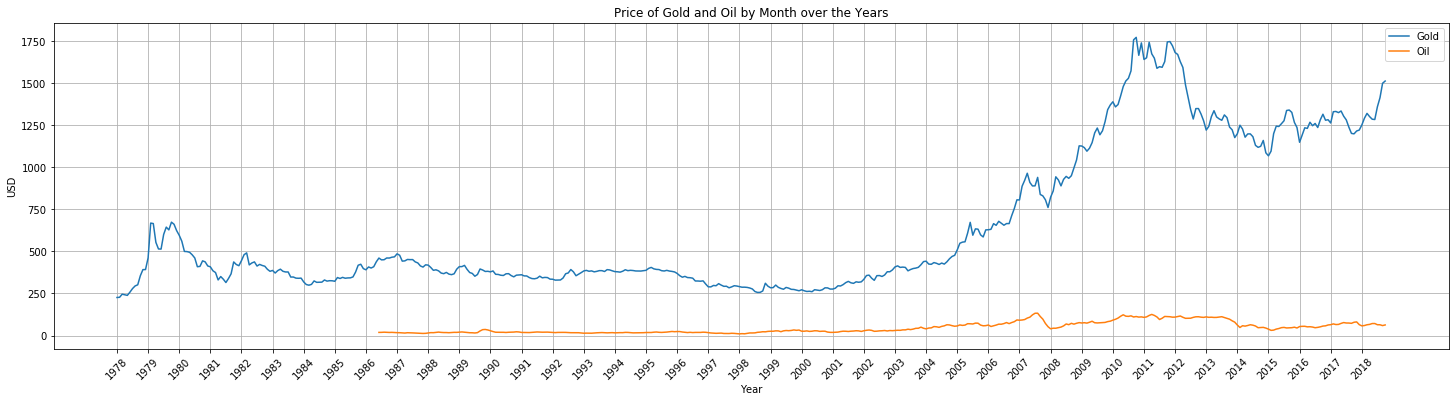

In [10]:
plt.figure(figsize=(25, 6))
plt.plot(aggregated_prices_yearmonthly.index.map(lambda idx: "%s-%s" % idx), aggregated_prices_yearmonthly["Gold"], label="Gold")
plt.plot(aggregated_prices_yearmonthly.index.map(lambda idx: "%s-%s" % idx), aggregated_prices_yearmonthly["Oil"], label="Oil")
plt.xticks(
    np.arange(len(plt.xticks()[0]), step=12),
    aggregated_prices_yearmonthly.index.map(lambda idx: idx[0])[np.arange(len(plt.xticks()[0]), step=12)],
    rotation=45
)
plt.legend()
plt.grid()
plt.xlabel("Year")
plt.ylabel("USD")
plt.title("Price of Gold and Oil by Month over the Years")
plt.show()

In [11]:
aggregated_prices_monthly = aggregated_prices.groupby(
    [aggregated_prices.index.month]
).aggregate(
    {"Gold": np.nanmean, "Oil": np.nanmean}
)

In [12]:
aggregated_prices_monthly

Gold        Oil
1   643.000055  43.973028
2   651.555435  44.635095
3   642.792936  46.047329
4   642.047008  47.604352
5   643.388779  48.196050
6   641.629897  47.036648
7   643.686909  47.502841
8   653.774339  48.017455
9   657.285132  47.061994
10  642.411950  46.882853
11  642.723396  44.657301
12  638.039278  43.812588

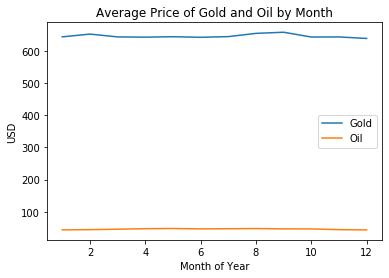

In [13]:
plt.plot(aggregated_prices_monthly.index, aggregated_prices_monthly["Gold"], label="Gold")
plt.plot(aggregated_prices_monthly.index, aggregated_prices_monthly["Oil"], label="Oil")
plt.legend()
plt.xlabel("Month of Year")
plt.ylabel("USD")
plt.title("Average Price of Gold and Oil by Month")
plt.show()